### Installing Package

"Deriv" package is used for Differentiation in R   
Doc: https://cran.r-project.org/web/packages/Deriv/Deriv.pdf

In [1]:
install.packages("Deriv")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Importing package

In [1]:
library(Deriv)

In [2]:
options(repr.plot.width = 6, repr.plot.height = 5)

#### Differentiating contant value and the result should be Zero

In [3]:
f <- function(x) {
    10
}

Deriv(f)

function (x) 
0

In [4]:
f <- function(x) {
    2345
}

Deriv(f)

function (x) 
0

In [7]:
f <- function(x) {
    x*2
}

Deriv(f)

function (x) 
2

In [8]:
f <- function(x) {
    x*3456
}

Deriv(f)

function (x) 
3456

#### Differention of x power 2 should be 2x

In [9]:
f <- function(x) {
    x**2
}

result <- Deriv(f)

result

function (x) 
2 * x

In [10]:
result(2)

[1] 4

In [11]:
result(15)

[1] 30

In [12]:
f <- function(x, y) {
    sin(x) * cos(y)
}

result <- Deriv(f)

result

function (x, y) 
c(x = cos(x) * cos(y), y = -(sin(x) * sin(y)))

In [13]:
result(60, 90)

x         y 
0.4267511 0.2724997

#### Differentiation with respect to x only

In [17]:
Deriv(~ f(x, y), "x")

cos(x) * cos(y)

#### Differentiation with respect to y only

In [18]:
Deriv(~ f(x, y), "y")

-(sin(x) * sin(y))

#### We can also differentiate with respect to x and y in below format

In [19]:
Deriv(~ f(x, y), c("x", "y"))

c(x = cos(x) * cos(y), y = -(sin(x) * sin(y)))

### Solving ODE (Ordinary Differential Equation) using ODE function in R

https://www.rdocumentation.org/packages/deSolve/versions/1.24/topics/ode

In [22]:
install.packages(c("deSolve", "ggplot2", "rmarkdown"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [20]:
library(ggplot2)
library(rmarkdown)
library(deSolve)

In [21]:
time_interval <- seq(0, 9, by =  1)

time_interval

[1] 0 1 2 3 4 5 6 7 8 9

In [22]:
state <- c(x = 0)

In [23]:
parameters <- c()

#### Integrating a constant and the result should be a line with a constant slope

In [24]:
model_fn <- function(t, state, parameters){
    with(as.list(c(state, parameters)), {
        dx <- 3
        
        return (list(dx))
    })
}

In [25]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)

head(result, 10)

time,x
0,0
1,3
2,6
3,9
4,12
5,15
6,18
7,21
8,24
9,27


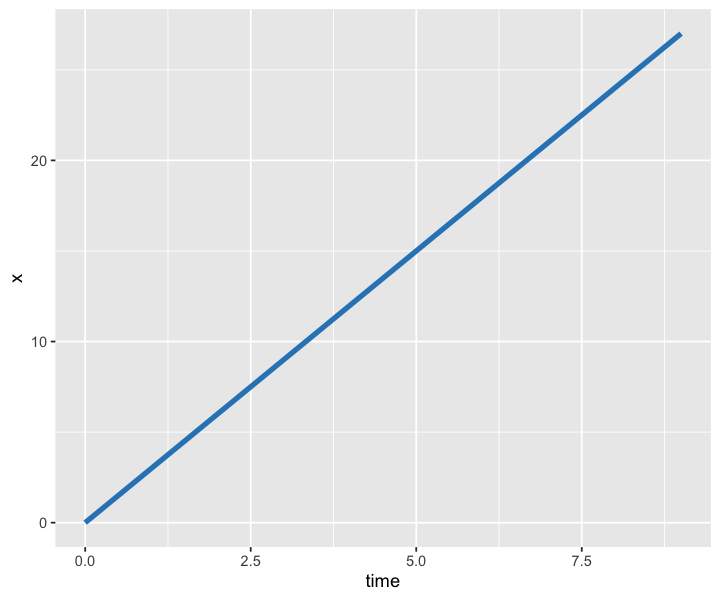

In [26]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) + 
        geom_line(color = "#2E86C1",size = 1.5)

plot

### Solving first order ODE and the output should be a curve

#### Initializing initial state and parameter value and we are giving values in vector form 

In [35]:
time_interval <- seq(0, 9, by = 1)

state <- c(x = 3)

parameters <- c()

model_fn <- function(t, state, parameters) {
     with(as.list(c(state, parameters)), {
          dx <- 3*t
         
          return(list(dx))
     })
}

In [48]:
## TODO while recording try 3*t first

# time_interval <- seq(0, 9, by = 1)

# state <- c(x = 3)

# parameters <- c(k = 50)

# model_fn <- function(t, state, parameters) {
#      with(as.list(c(state, parameters)), {
#           dx <- t*t + k

#           return(list(dx))
#      })
# }

In [49]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)

In [50]:
head(result, 1000)

time,x
0,3.00000
1,53.33333
2,105.66666
3,161.99999
4,224.33333
5,294.66666
6,374.99999
7,467.33333
8,573.66666
9,695.99999


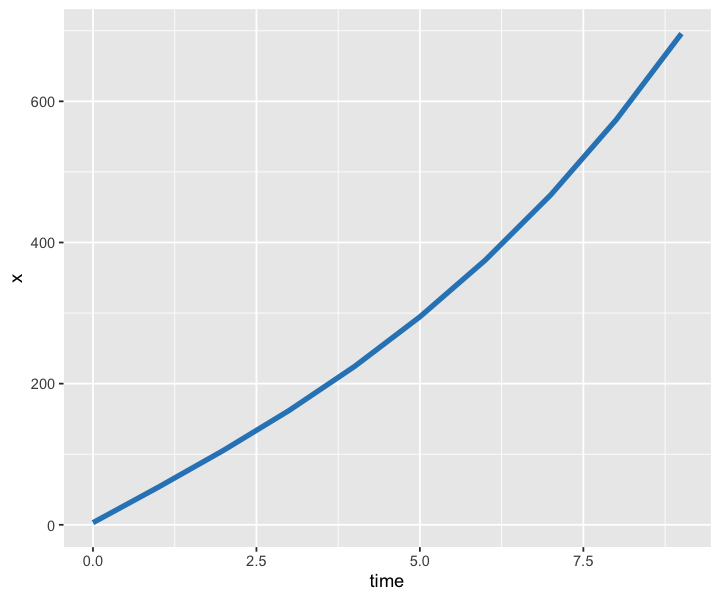

In [51]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) + 
        geom_line(color = "#2E86C1",size = 1.5)

plot

### Solving ODE (x (1 - kx))

#### First we will do the integration manually and then use the ode function and in visualization we will compare both of the result

In [53]:
time_interval <- seq(0, 10, by = 0.5)

time_interval

[1]  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0
[16]  7.5  8.0  8.5  9.0  9.5 10.0

In [54]:
diff_func <- function(x, k) {
    x * (1 - k*x)
}

In [55]:
state <- c(x = 0.1)

In [56]:
k <- 0.2

result_list <- c()

In [57]:
result_list[1] <- state

In [58]:
for (i in 1:(length(time_interval) - 1)) {

    result_list[i + 1] = result_list[i] + 
                         0.5 * diff_func(result_list[i], k)
}

In [59]:
result_list

[1] 0.1000000 0.1490000 0.2212799 0.3270234 0.4798406 0.6967362 0.9965602
 [8] 1.3955271 1.8985411 2.4873658 3.1123498 3.6998526 4.1808880 4.5233495
[15] 4.7389552 4.8626632 4.9294454 4.9642249 4.9819845 4.9909598 4.9954717

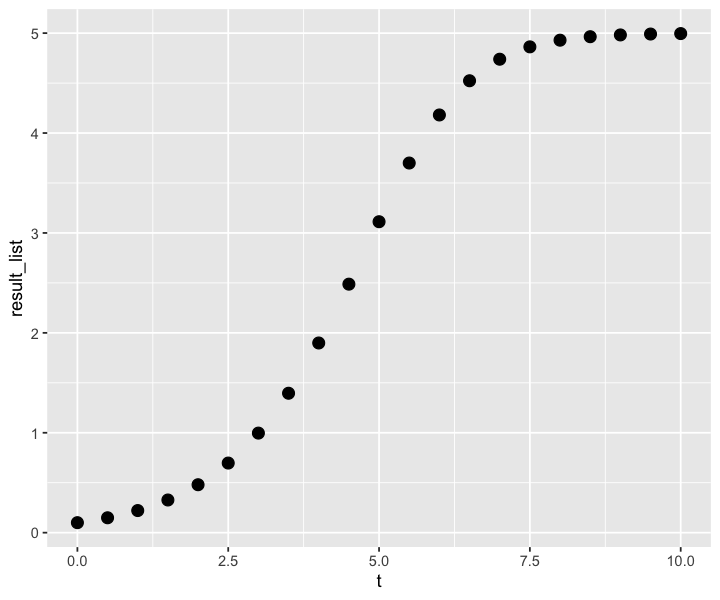

In [60]:
approximation <- ggplot(data = data.frame(p = result_list, t = time_interval), 
                        aes(t, result_list)) + geom_point(size = 3)

print(approximation)

In [61]:
parameters <- c(k = 0.2)

In [62]:
model_fn <- function(t, state, parameters) {
     with(as.list(c(state, parameters)), {
         dx <- x * (1 - k * x)
         
         return(list(dx))
     })
}

In [63]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)

In [64]:
head(result, 10)

time,x
0.0,0.1000000
0.5,0.1627619
1.0,0.2627987
1.5,0.4189936
2.0,0.6551831
2.5,0.9955795
3.0,1.4536600
3.5,2.0163866
4.0,2.6350863
4.5,3.2376200


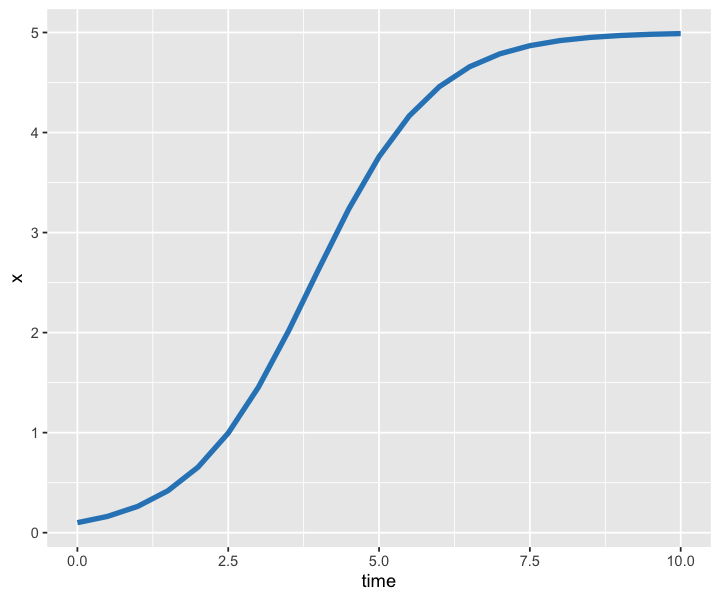

In [65]:
ggplot(data = as.data.frame(result), aes(time, x)) + geom_line(color = "#2E86C1", size = 1.5)

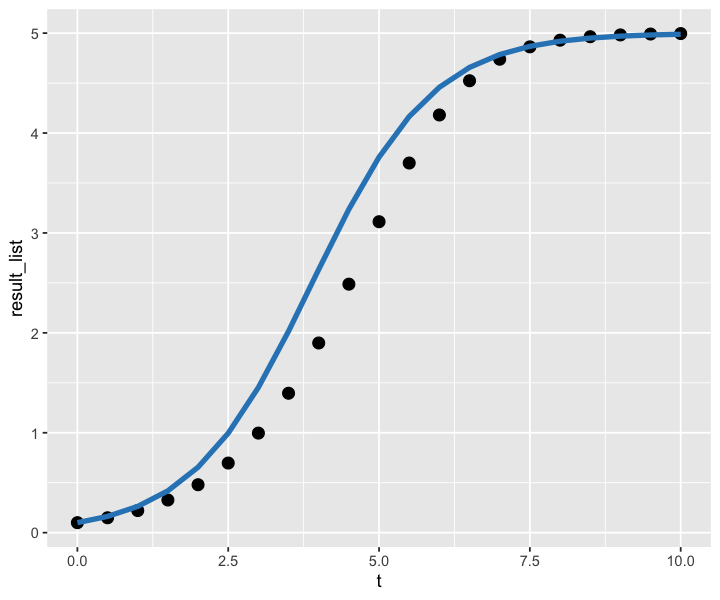

In [66]:
ggplot() + geom_point(data = data.frame(p = result_list, t = time_interval), aes(t, result_list), size=3) + 
geom_line(data = as.data.frame(result), aes(time, x), color = "#2E86C1", size = 1.5)

### Solving a real time ODE equation for population growth

http://ncsce.net/ordinary-differential-equations-in-real-world-situations/

Source of equation: https://calcworkshop.com/diff-eqs/logistic-differential-equation/

### dx/dt = r x(1 − x/K)

where, growth rate(r) = 1.5%/year, carrying capacity(K) for the environment = 10 and initial population(x(0)) = 0.1 billion 

In [67]:
time_interval <- seq(from = 0, to = 10, by = 0.05)

In [68]:
parameters <- c(r = 1.5, k = 10)

In [69]:
state <- c(x = 0.1)

In [70]:
model_fn <- function(t, state, parameters) {
    with(as.list(c(state, parameters)), {
        
        dx <- r * x * (1 - x / k)

        return(list(dx))
    })
}

In [71]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)

In [72]:
head(result,10)

time,x
0.00,0.1000000
0.05,0.1077046
0.10,0.1159967
0.15,0.1249178
0.20,0.1345162
0.25,0.1448413
0.30,0.1559463
0.35,0.1678880
0.40,0.1807275
0.45,0.1945295


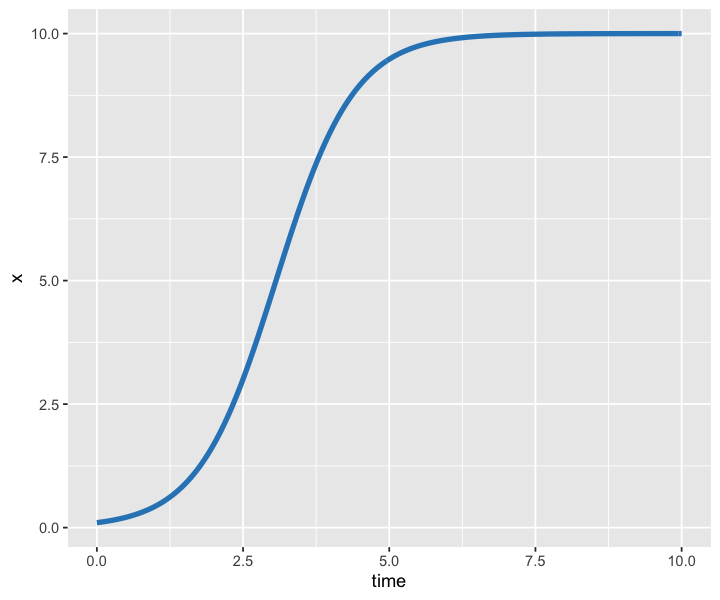

In [73]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) + 
        geom_line(color = "#2E86C1", size = 1.5)

plot